In [12]:
import pandas as pd
import numpy as np
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
# from xgboost import XGBClassifier
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/test_scores.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [14]:
for i in range(2133):
    df['target'][i] = (df['pretest'][i] + df['posttest'][i]) / 2
    if df['target'][i] >= 60:
        df['target'][i] = 1
    else:
        df['target'][i] = 0

C:\Users\OwenLin\AppData\Local\Temp\ipykernel_17632\1247858883.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['target'][i] = (df['pretest'][i] + df['posttest'][i]) / 2
C:\Users\OwenLin\AppData\Local\Temp\ipykernel_17632\1247858883.py

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
 11  target           2133 non-null   float64
dtypes: float64(4), object(8)
memory usage: 200.1+ KB


In [17]:
df.head()

school school_setting school_type classroom teaching_method  n_student  \
0  ANKYI          Urban  Non-public       6OL        Standard       20.0   
1  ANKYI          Urban  Non-public       6OL        Standard       20.0   
2  ANKYI          Urban  Non-public       6OL        Standard       20.0   
3  ANKYI          Urban  Non-public       6OL        Standard       20.0   
4  ANKYI          Urban  Non-public       6OL        Standard       20.0   

  student_id  gender             lunch  pretest  posttest  target  
0      2FHT3  Female  Does not qualify     62.0      72.0     1.0  
1      3JIVH  Female  Does not qualify     66.0      79.0     1.0  
2      3XOWE    Male  Does not qualify     64.0      76.0     1.0  
3      556O0  Female  Does not qualify     61.0      77.0     1.0  
4      74LOE    Male  Does not qualify     64.0      76.0     1.0

In [19]:
labels = df["target"].value_counts()

([<matplotlib.patches.Wedge at 0x2517dbcc8d0>,
 [Text(-0.16222988306034233, 1.0879712611288166, 'Fail'),
  Text(0.17697816537115924, -1.186877722843368, 'Pass')],
 [Text(-0.08848902712382307, 0.5934388697066272, '54.7%'),
  Text(0.1032372631331762, -0.6923453383252979, '45.3%')])

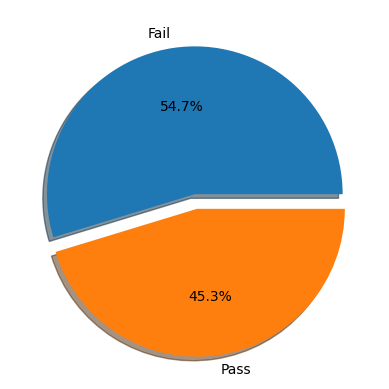

In [22]:
plt.pie(labels, labels = ['Fail','Pass'], explode=(0, 0.1), autopct='%1.1f%%', shadow=True)